In [1]:
import pandas as pd
movies = pd.read_csv('movies.csv', usecols=['movieId', 'title'])

In [2]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [3]:
rating = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'])
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [4]:
movies.shape

(9742, 2)

In [5]:
rating.shape

(100836, 3)

In [13]:
movie_data = pd.merge(movies, rating, on='movieId')
movie_data.head(5)

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


<ipython-input-25-f3da283ad250>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([num for num in ax.get_yticks()])


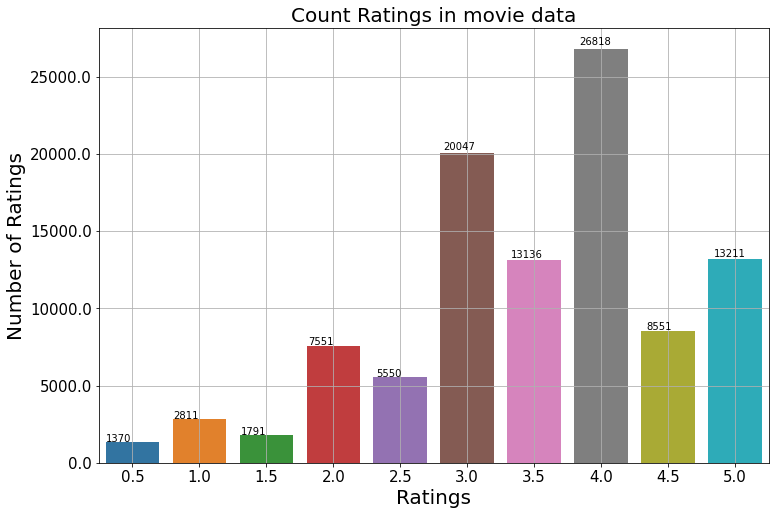

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.countplot(x='rating', data=movie_data)
for q in ax.patches:
    ax.annotate(str(q.get_height()), (q.get_x() * 1.01 , q.get_height() * 1.01))
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in movie data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.grid()

In [18]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [19]:
ratings_mean_count['rating_count'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

,rating,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


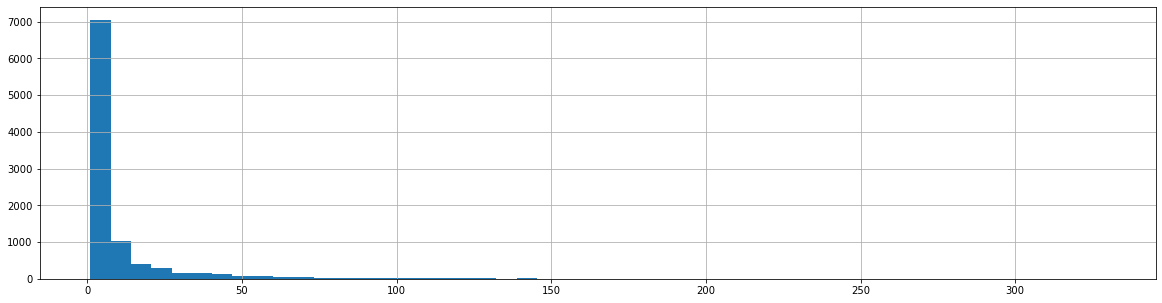

In [21]:
plt.figure(figsize=(20,5))
ratings_mean_count['rating_count'].hist(bins=50)
plt.show()

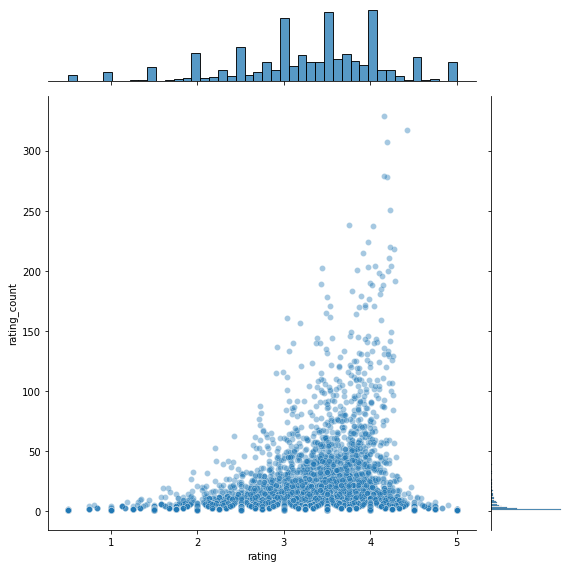

In [23]:
sns.jointplot(x='rating', y='rating_count', data=ratings_mean_count, alpha=0.4,height=8)
plt.show()

In [26]:
## create a matrix movies x userId and fill rating in the cells
# moviesId -> in row index
# userId -> in column index
# rating -> in cells
movies_users = rating.pivot(index='movieId', columns='userId', values='rating').fillna(0)
movies_users.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from scipy.sparse import csr_matrix 

In [28]:
## create a sparse matrix of "movies_users" dataset
mat_movies = csr_matrix(movies_users.values)

## Implement machine learning Algo

In [29]:
from sklearn.neighbors import NearestNeighbors

In [30]:
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors= 20)
model.fit(mat_movies)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [31]:
# import basic AI library to actually increase our searching process
from fuzzywuzzy import process

In [32]:
def recommender(movie_name, data, n):
    idx = process.extractOne(movie_name,movies['title'])[2] # only take movie index number
    print('Movie Selected : ', movies['title'][idx], 'Index : ', idx)
    print('Searching for recommondation .... please wait')
    distance, indices = model.kneighbors(data[idx], n_neighbors=n)
    for i in indices:
        print(movies['title'][i].where(i!=idx))

In [33]:
recommender('Jumanji', mat_movies, 10)

Movie Selected :  Jumanji (1995) Index :  1
Searching for recommondation .... please wait
1                                         NaN
322                     Lion King, The (1994)
436                     Mrs. Doubtfire (1993)
325                          Mask, The (1994)
418                      Jurassic Park (1993)
504                         Home Alone (1990)
483    Nightmare Before Christmas, The (1993)
506                            Aladdin (1992)
512               Beauty and the Beast (1991)
18      Ace Ventura: When Nature Calls (1995)
Name: title, dtype: object
